# [1.1] Epsilon-Greedy

Epsilon-Greedy is the most important algorithm of this section as the subsequent solutions use epsilon-greedy inherently. While methods like UCB perform better than epsilon-greedy in most cases, the structure of the algorithms remaining mostly the same.

#### Need of epsilon-greedy.

In our previous casino example with 2 slot machines, we have observed how a naive greedy approach of choosing a slot with maximum likelihood can yield detrimental results.

<span class = "hital">Greedy approach</span>

- Roughly means being short-sighted
- Using only immediate available information as a heuristic.

In our case being greedy is to pick the slot machine with highest “Maximum Likelihood Estimate” without any regard to how much data we collect or about the confidence of selection.

Epsilon-greedy is an approach that says “instead of going the greedy approach every single time, we shall have a small probability and explore slot machines at random.” without any regard to its win-rate.

This small probability is denoted by $\epsilon$ and its value is typically 5%, 10%

Estimated probabilities 0.9013999395709517
Estimated probabilities 0.7812500000000001
Estimated probabilities 0.5128205128205127
Total reward earned =  8995.0
Overall win rate =  0.8995
Number of times explored =  104
Number of times exploited =  9896
Number of optimal pulls =  9894


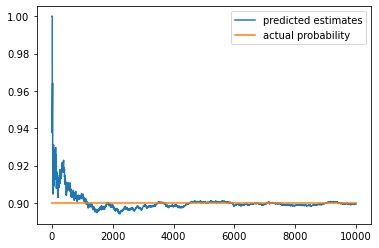

In [1]:
## Multi-Arm Bandit code
import numpy as np
import matplotlib.pyplot as plt
Bandit_probs= [0.9,0.8,0.5]
epsilon = 0.01
num_trails = 10000

class Bandit:
    def __init__(self, prob):
        self.actual_prob = prob
        self.prob_estimate = 0
        self.N = 0
    def pull(self):
        return np.random.random()<self.actual_prob
    def update(self,x):
        self.N+=1
        self.prob_estimate+=(1/self.N)*(x-self.prob_estimate)
    
def experiment():
    bandits = [Bandit(p) for p in Bandit_probs]
    rewards = np.zeros(num_trails)
    num_explored = 0
    num_exploited = 0
    num_optimal = 0
    optimal_j = np.argmax([b.actual_prob for b in bandits])
    for i in range(num_trails):
        if np.random.random()<epsilon:
            num_explored +=1
            j = np.random.choice(len(bandits))
        else:
            num_exploited +=1
            j = np.argmax([b.prob_estimate for b in bandits])
            if j == optimal_j:
                num_optimal+=1
        
        rewards[i] = bandits[j].pull()
        bandits[j].update(rewards[i])
    for b in bandits:
        print("Estimated probabilities", b.prob_estimate)
        
    print("Total reward earned = ", rewards.sum())
    print("Overall win rate = ", rewards.sum()/num_trails)
    print("Number of times explored = ", num_explored)
    print("Number of times exploited = ", num_exploited)
    print("Number of optimal pulls = ", num_optimal)
    
    #plot the results
    cummulative_rewards = np.cumsum(rewards)
    win_rates = cummulative_rewards/(np.arange(num_trails)+1)
    plt.plot(win_rates, label = "predicted estimates")
    plt.plot(np.ones(num_trails)*np.max(Bandit_probs), label = 'actual probability')
    plt.legend()
    plt.show()
    
if __name__ == "__main__":
    experiment()